In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [13]:
img = cv2.imread('../raw_data/vuelta-a-espana-2022-stage-20.jpeg')

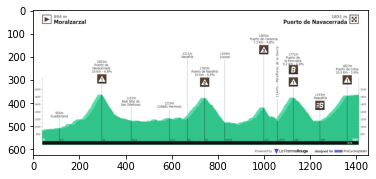

In [29]:
plt.imshow(img)

In [14]:
h,w = img.shape[:2]
mask = np.zeros((h,w), np.uint8)


In [15]:
# Transform to gray colorspace and threshold the image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [16]:
# Search for contours and select the biggest one and draw it on mask
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cnt = max(contours, key=cv2.contourArea)
cv2.drawContours(mask, [cnt], 0, 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
# Perform a bitwise operation
res = cv2.bitwise_and(img, img, mask=mask)

In [18]:
# Convert black pixels back to white
black = np.where(res==0)
res[black[0], black[1], :] = [255, 255, 255]

In [19]:
# Display the image
cv2.imshow('img', res)

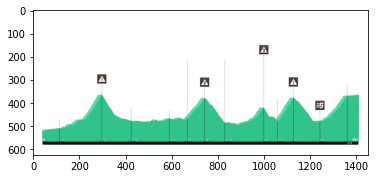

In [27]:
plt.imshow(res)

In [30]:
res

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [6]:
h,w = img.shape[:2]
mask = np.zeros((h,w), np.uint8)

# Transform to gray colorspace and threshold the image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Search for contours and select the biggest one and draw it on mask
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cnt = max(contours, key=cv2.contourArea)
cv2.drawContours(mask, [cnt], 0, 255, -1)

# Perform a bitwise operation
res = cv2.bitwise_and(img, img, mask=mask)

# Convert black pixels back to white
black = np.where(res==0)
res[black[0], black[1], :] = [255, 255, 255]

# Display the image
cv2.imshow('img', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

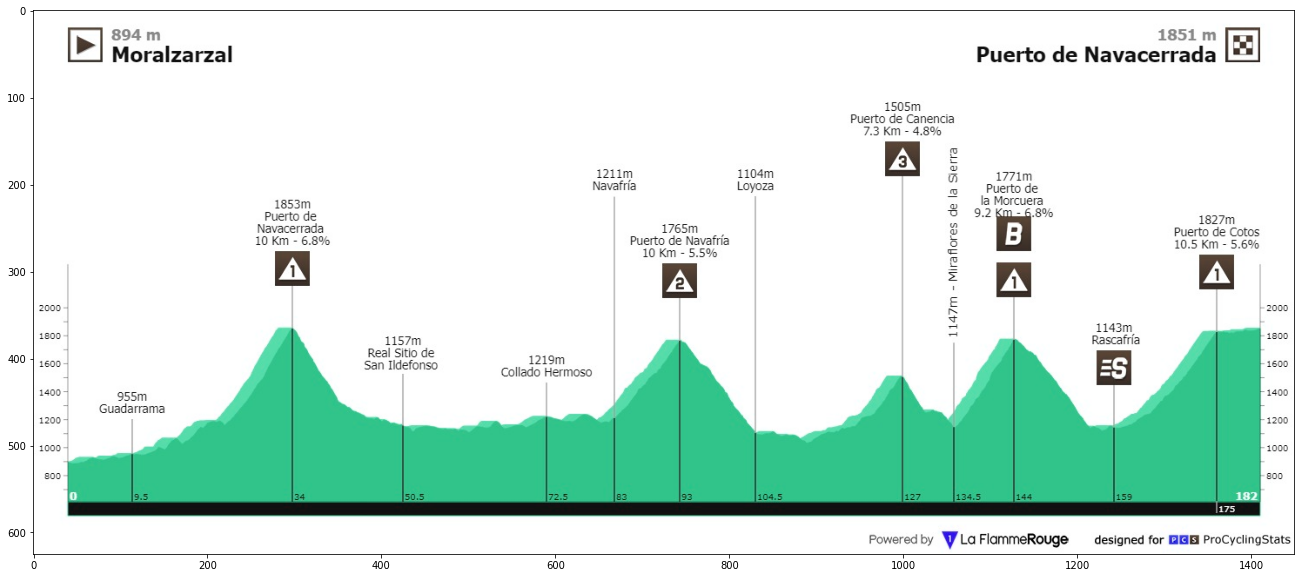

In [146]:
image = cv2.imread('../raw_data/vuelta-a-espana-2022-stage-20.jpeg')
plt.figure(figsize=(30,10))
plt.imshow(image)

In [147]:
## convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## mask of green (36,25,25) ~ (86, 255,255)
mask = cv2.inRange(hsv, (36, 25, 25), (86, 255,255))
#mask = cv2.inRange(hsv, (36, 25, 25), (70, 255,255))

## slice the green
imask = mask>0
green = np.zeros_like(img, np.uint8)
green[imask] = img[imask]

In [148]:
# convert to RGB
image = cv2.cvtColor(green, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(green, cv2.COLOR_RGB2GRAY)

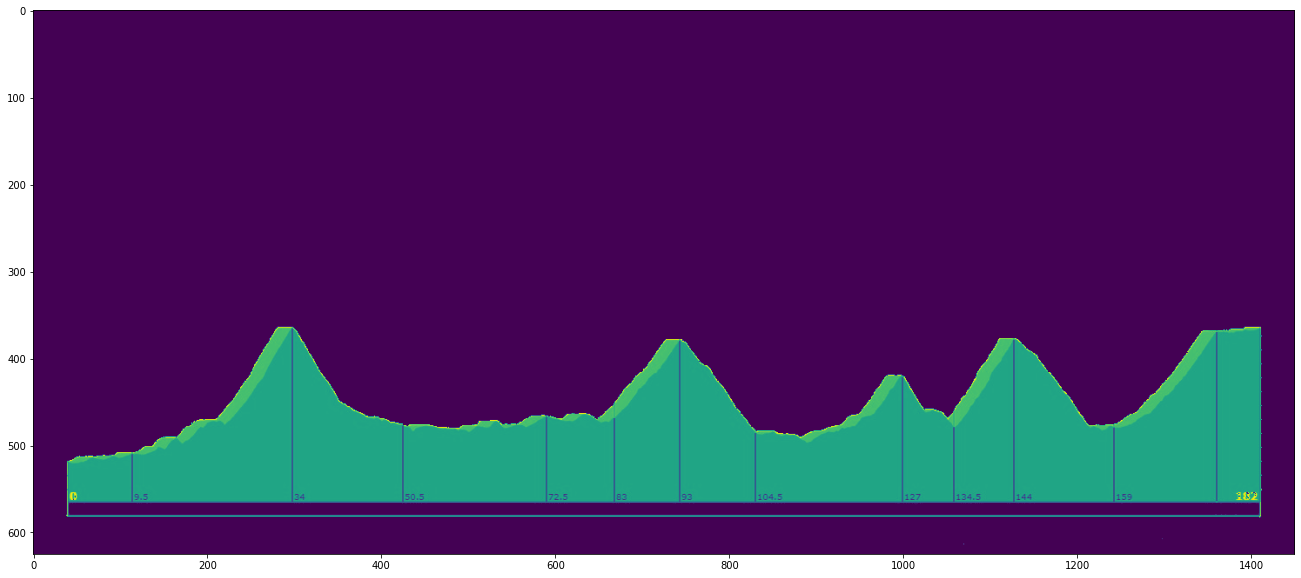

In [150]:
plt.figure(figsize=(30,10))
plt.imshow(gray)

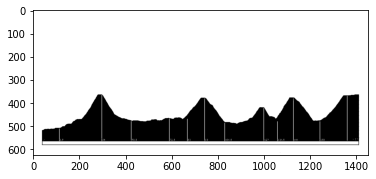

In [151]:
# create a binary thresholded image
_, binary = cv2.threshold(gray, 75, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

In [152]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# draw all contours
image = cv2.drawContours(image, contours, -1, (0, 1, 0), 2)

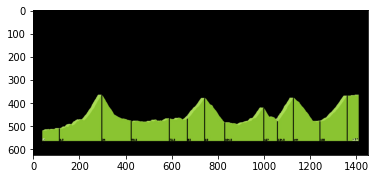

In [153]:
# show the image with the drawn contours
plt.imshow(image)
plt.show()

In [154]:
contours[0].shape, contours[1].shape

((4146, 1, 2), (4, 1, 2))

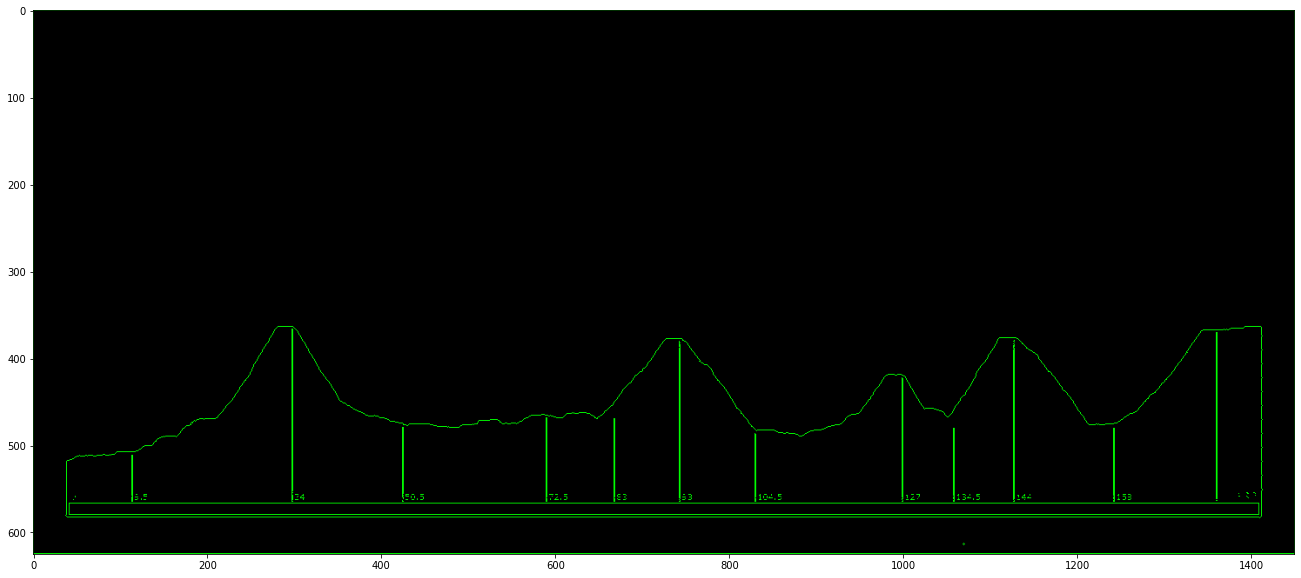

In [155]:
## Draw 
canvas = np.zeros_like(image)
cv2.drawContours(canvas , contours, -1, (0, 255, 0), 1)

plt.figure(figsize=(40,10))
plt.imshow(canvas)

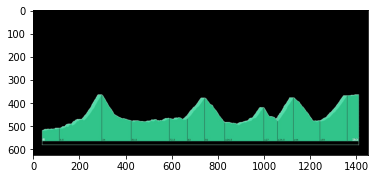

In [156]:
## convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## mask of green (36,25,25) ~ (86, 255,255)
# mask = cv2.inRange(hsv, (36, 25, 25), (86, 255,255))
mask = cv2.inRange(hsv, (36, 25, 25), (70, 255,255))

## slice the green
imask = mask>0
green = np.zeros_like(img, np.uint8)
green[imask] = img[imask]

## save 
plt.imshow(green)